In [1]:
library(causalTree)
library(rpart.plot)

Loading required package: rpart

Loading required package: rpart.plot

Warning message:
"package 'rpart.plot' was built under R version 4.4.2"
Loading required package: data.table

Warning message:
"package 'data.table' was built under R version 4.4.2"


In [3]:
setwd('C:/Users/wujin/OneDrive/桌面/NSTC plan/CausalML')
df <- read.csv("cleaned_cgrd_data_no_negatives.csv")
mydata1=df[which(df$bloc=='1'),]
names(mydata1)
mydata1=as.data.frame(mydata1)
mydata=mydata1[c('died_in_hosp',
                 'gender',
                 'age',
                 'Weight_kg',
                 'GCS',
                 'HR',
                 'SysBP',
                 'MeanBP',
                 'DiaBP',
                 'RR',
                 'SpO2',
                 'Temp_C',
                 'FiO2_1',
                 'Potassium',
                 'Sodium',
                 'Chloride',
                 'Glucose',
                 'BUN',
                 'Creatinine',
                 'Magnesium',
                 'Calcium',
                 'Ionised_Ca',
                 'CO2_mEqL',
                 'SGOT',
                 'SGPT',
                 'Total_bili',
                 'Albumin',
                 'Hb',
                 'WBC_count',
                 'Platelets_count',
                 'PTT',
                 'PT',
                 'INR',
                 'Arterial_pH',
                 'paO2',
                 'paCO2',
                 'Arterial_BE',
                 'HCO3',
                 'Arterial_lactate',
                 'mechvent',
                 'Shock_Index',
                 'PaO2_FiO2',
                 'median_dose_vaso',
                 'max_dose_vaso',
                 'input_total',
                 'input_4hourly',
                 'output_total',
                 'output_4hourly',
                 'cumulated_balance',
                 'SOFA',
                 'SIRS')]

[1] "bloc"                                      
 [2] "icustayid"                                 
 [3] "charttime"                                 
 [4] "gender"                                    
 [5] "age"                                       
 [6] "elixhauser"                                
 [7] "re_admission"                              
 [8] "died_in_hosp"                              
 [9] "died_within_48h_of_out_time"               
[10] "mortality_90d"                             
[11] "delay_end_of_record_and_discharge_or_death"
[12] "Weight_kg"                                 
[13] "GCS"                                       
[14] "HR"                                        
[15] "SysBP"                                     
[16] "MeanBP"                                    
[17] "DiaBP"                                     
[18] "RR"                                        
[19] "SpO2"                                      
[20] "Temp_C"                                    
[21] "FiO2_1"                                    
[22] "Potassium"                                 
[23] "Sodium"                                    
[24] "Chloride"                                  
[25] "Glucose"                                   
[26] "BUN"                                       
[27] "Creatinine"                                
[28] "Magnesium"                                 
[29] "Calcium"                                   
[30] "Ionised_Ca"                                
[31] "CO2_mEqL"                                  
[32] "SGOT"                                      
[33] "SGPT"                                      
[34] "Total_bili"                                
[35] "Albumin"                                   
[36] "Hb"                                        
[37] "WBC_count"                                 
[38] "Platelets_count"                           
[39] "PTT"                                       
[40] "PT"                                        
[41] "INR"                                       
[42] "Arterial_pH"                               
[43] "paO2"                                      
[44] "paCO2"                                     
[45] "Arterial_BE"                               
[46] "Arterial_lactate"                          
[47] "HCO3"                                      
[48] "mechvent"                                  
[49] "Shock_Index"                               
[50] "PaO2_FiO2"                                 
[51] "median_dose_vaso"                          
[52] "max_dose_vaso"                             
[53] "input_total"                               
[54] "input_4hourly"                             
[55] "output_total"                              
[56] "output_4hourly"                            
[57] "cumulated_balance"                         
[58] "SOFA"                                      
[59] "SIRS"

In [4]:
median(mydata$input_4hourly)
mydata$A1=ifelse(mydata$input_4hourly>=median(mydata$input_4hourly),1,0)
mydata$A1
mydata=as.data.frame(mydata)
mydata <- mydata[c('A1', 
                   'died_in_hosp',
                   'gender',
                   'age',
                    'Weight_kg',
                    'GCS',
                    'HR',
                    'SysBP',
                    'MeanBP',
                    'DiaBP',
                    'RR',
                    'SpO2',
                    'Temp_C',
                    'FiO2_1',
                    'Potassium',
                    'Sodium',
                    'Chloride',
                    'Glucose',
                    'BUN',
                    'Creatinine',
                    'Magnesium',
                    'Calcium',
                    'CO2_mEqL',
                    'SGOT',
                    'SGPT',
                    'Total_bili',
                    'Albumin',
                    'Hb',
                    'WBC_count',
                    'Platelets_count',
                    'PTT',
                    'PT',
                    'INR',
                    'Arterial_pH',
                    'paO2',
                    'paCO2',
                    'Arterial_BE',
                    'HCO3',
                    'Arterial_lactate',
                    'mechvent',
                    'Shock_Index',
                    'PaO2_FiO2')]

[1] 44

[1] 0 0 0 0 0 0 0 0 1 1 0 0 1 1 1 1 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1
  [38] 0 1 0 0 1 1 0 0 0 0 1 1 1 0 1 1 1 1 1 1 1 0 0 1 1 1 0 1 0 0 0 1 1 0 0 1 1
  [75] 1 0 1 1 1 1 1 0 0 0 1 0 0 0 0 1 1 0 1 1 0 0 1 1 1 0 0 1 0 0 0 0 0 0 0 1 1
 [112] 1 1 0 1 1 1 0 1 0 1 1 1 1 1 0 1 0 0 0 0 1 1 1 1 1 1 1 1 0 0 0 1 1 0 0 1 1
 [149] 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 0 1 1 1 0 0 0 0 0
 [186] 0 0 0 0 1 0 1 0 1 1 0 1 1 1 0 1 1 1 1 0 0 0 1 0 1 1 0 1 1 1 1 0 0 0 1 1 1
 [223] 1 1 0 1 0 1 1 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 1 0 0 1 0 1 1 1 1 0 0 1 1 1 0
 [260] 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 0 0 0 0 0
 [297] 1 0 0 0 0 0 1 1 1 1 1 1 1 1 0 1 1 0 0 0 1 1 1 1 1 1 1 0 0 0 0 1 0 1 1 1 1
 [334] 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 0 0 0 0 1 1 1 0 0 0 1 1 0
 [371] 0 0 0 1 0 0 0 0 0 0 0 1 1 1 1 0 1 0 0 0 0 0 0 1 0 0 0 1 1 1 1 1 0 0 0 0 0
 [408] 1 0 0 0 1 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 1 1 0 1
 [445] 0 0 0 0 0 0 1 1 1 1 0 1 1 1 0 1 0 0 0 0 0 1 1 1 1 1 0 1 0 0 0 0 0 1 1 0 0
 [482] 1 0 0 1 0 1 1 0 0 0 1 1 0 1 1 1 1 1 1 1 0 0 1 1 0 0 1 1 0 0 0 1 0 0 0 0 0
 [519] 1 0 0 0 0 0 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 0 0 0 0 1 1 1 0 0 0 1 1 1 0
 [556] 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 1 0 0 0 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0
 [593] 0 1 1 1 0 0 1 1 0 0 0 0 1 1 0 0 0 1 0 0 1 0 0 0 1 1 1 1 1 1 1 0 1 0 0 1 0
 [630] 0 0 0 0 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 0 0 1 0 0 0 0 1 1 1 1 1 1 1 1 1
 [667] 1 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 1 0 0 1 1 0 0 0
 [704] 1 1 1 1 0 1 1 1 1 1 0 0 0 0 1 0 0 1 1 1 0 1 1 1 1 1 1 1 1 0 1 0 0 0 1 0 0
 [741] 0 1 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0 1 1 1 1 1 1 1
 [778] 1 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 1 1 1 0 0 1 0 0 1 1 1 1 1 0 0 0 0 1 0 0
 [815] 1 1 1 1 1 1 0 0 1 0 0 1 1 0 1 1 1 1 1 0 0 1 1 1 1 1 1 1 0 0 1 0 0 0 0 1 1
 [852] 1 1 0 0 1 1 1 0 1 0 0 1 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 1 1
 [889] 0 0 1 1 1 1 0 0 0 0 1 0 1 1 1 1 1 1 1 0 0 0 1 0 1 0 1 1 1 1 0 0 0 1 0 1 0
 [926] 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [963] 1 1 1 1 0 1 1 1 0 0 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 1 0 0 1 1 1 1 1 1 1 1
[1000] 0 0 0 0 1 1 1 1 1 1 1 0 1 1 1 1 0 0 0 1 1 1 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0
[1037] 1 0 0 0 0 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 0 0 0 0 0 1 1 1 1 0 1 1 0 0 1 1 0
[1074] 1 0 0 1 1 1 1 1 1 1 0 0 1 1 0 1 1 1 1 1 1 0 0 1 1 1 0 0 1 1 1 1 0 0 0 1 1
[1111] 1 0 0 0 0 0 0 1 1 1 1 0 1 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1
[1148] 1 0 0 0 0 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 0 0 0 0 0 0 1 0 1 1 0
[1185] 0 1 1 1 1 1 0 0 0 0 0 0 1 1 1 1 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 0
[1222] 0 0 1 1 1 1 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0
[1259] 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 1 1 0 0 1 1 1 0 0 0 0
[1296] 1 1 1 1 0 0 1 1 1 1 0 1 1 0 0 1 1 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0
[1333] 1 0 1 0 1 0 0 0 1 1 1 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
[1370] 1 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 1 1 0 1 1 1 0 0 1 1 1 1 1 1 1 1 0 1 0 0 1
[1407] 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 1 0 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 1 1 0 1
[1444] 1 1 0 0 0 1 0 1 1 1 1 0 1 1 1 1 0 0 0 0 1 0 0 0 1 1 1 1 1 0 0 0 0 0 1 0 0
[1481] 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 1 0 1 1 1 0 1 1 1 1 0 1 1 1 0 0 0 1 0 0
[1518] 1 1 1 0 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 0 0 0 0 0 0 1
[1555] 1 0 0 0 0 0 0 1 1 1 0 0 0 1 0 0 1 1 1 1 0 0 0 1 1 1 1 0 0 1 1 1 1 0 0 0 1
[1592] 1 1 1 1 1 1 0 1 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0
[1629] 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[1666] 1 1 1 0 0 1 1 1 0 0 1 1 0 0 1 1 1 0 0 0 1 1 1 1 0 1 1 1 0 0 0 0 0 1 1 1 0
[1703] 0 1 0 0 0 0 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 0 1 0 0 0 0 0 1 0 0 1
[1740] 1 1 1 1 0 0 0 0 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1
[1777] 0 1 1 1 1 1 0 0 0 0 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 0 0 1 1 1
[1814] 0 0 0 0 0 0 0 1 1 1 0 0 0 1

In [5]:
mydata$treatment_effect <- ifelse(mydata$A1 == 1, mydata$died_in_hosp, 0)

tree <- causalTree(
  treatment_effect ~ gender + age + GCS + HR + SysBP + MeanBP + SpO2 + Temp_C + FiO2_1 +
    Potassium + Sodium + Chloride + Glucose + BUN + Creatinine + Magnesium + Calcium + CO2_mEqL +
    SGOT + SGPT + Total_bili + Albumin + Hb + WBC_count + Platelets_count + PTT + PT + INR +
    Arterial_pH + paO2 + paCO2 + Arterial_BE + HCO3 + Arterial_lactate + mechvent + Shock_Index +
    PaO2_FiO2, 
  treatment = mydata$A1, 
  data = mydata, 
  split.Rule = "CT", 
  split.Honest = TRUE, 
  split.Bucket = FALSE, 
  cv.option = "CT", 
  minsize = 63
)

[1] 2
[1] "CT"


In [6]:
# Optimal pruning
cp_table <- tree$cptable
optimal_cp <- cp_table[which.min(cp_table[, "xerror"]), "CP"]
pruned_tree <- prune(tree, cp = optimal_cp)

node_predictions <- pruned_tree$frame$yval
node_sizes <- pruned_tree$frame$n

custom_labels <- paste0(
  "Mortality: ", round(node_predictions, 2), 
  "\nCount: ", node_sizes
)

Warning message:
"labs do not fit even at cex 0.15, there may be some overplotting"
Warning message:
"cex and tweak both specified, applying both"


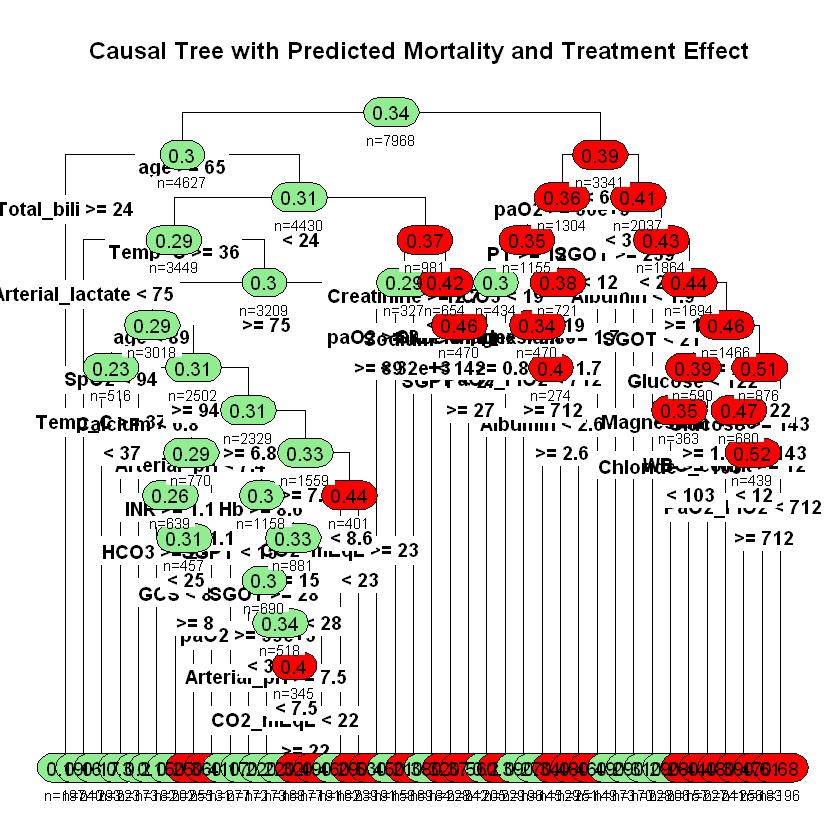

In [7]:
rpart.plot(
  pruned_tree,
  main = "Causal Tree with Predicted Mortality and Treatment Effect", 
  type = 4, 
  extra = 1,               # Suppress default extra info
  box.palette = c("lightgreen", "red"),
  under = TRUE,
  faclen = 1,
  cex = 0.8,
  digits = 2,
  fallen.leaves = TRUE,    # Better visualization for trees
  tweak = 1.2              # Adjust the spacing
)